# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [2]:
genome_ids = ['HG02323', 'HG02337', 'HG02555', 'HG02284', 'HG02053', 'HG02307', 'HG02052', 'HG01986', 'HG02549', 'HG02479', 'HG02554', 'HG02427', 'HG02471', 'HG01880', 'HG02419', 'HG02332', 'HG02108', 'HG01883', 'HG02537', 'HG02318', 'HG01985', 'HG02484', 'HG02497', 'HG02470', 'HG02334', 'HG02476', 'HG02545', 'HG02054', 'HG02330', 'HG01879', 'HG02501', 'HG02450', 'HG02317', 'HG02477', 'HG02489', 'HG01890', 'HG02502', 'HG02481', 'HG02449', 'HG02546', 'HG02439', 'HG01882', 'HG02558', 'HG02433', 'HG02496', 'HG02508', 'HG01896', 'HG01894', 'HG02445', 'HG02283', 'HG02255', 'HG02256', 'HG02580', 'HG02051', 'HG01889', 'HG02014', 'HG02511', 'HG01885', 'HG01988', 'HG01912', 'HG02420', 'HG02315', 'HG02111', 'HG01958', 'HG02095', 'HG01886', 'HG01990', 'HG02541', 'HG02314', 'HG01956', 'HG02442', 'HG02429', 'HG01914', 'HG02282', 'HG02325', 'HG02505', 'HG02010', 'HG02309', 'HG02322', 'HG02107', 'HG02144', 'HG02012', 'HG02308', 'HG02536', 'HG02436', 'HG02343', 'HG02009', 'HG01915', 'HG02485', 'HG02577', 'HG01989', 'HG02281', 'HG02455', 'HG02143', 'HG02557', 'HG02013', 'HG02339']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [4]:
root_dir = join(Path.home(),"cp_als/populations")

In [5]:
infile = join(root_dir,"output/ACB/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/ACB/all.csv'

In [6]:
df = pd.read_csv(infile)

In [7]:
df = df[genome_ids + ['gene']]
df.head()

,HG02323,HG02337,HG02555,HG02284,HG02053,HG02307,HG02052,HG01986,HG02549,HG02479,...,HG02485,HG02577,HG01989,HG02281,HG02455,HG02143,HG02557,HG02013,HG02339,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,1,0,1,1,1,1,1,0,1,1,...,0,0,1,1,0,1,1,1,0,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [8]:
sdf=df.groupby(["gene"]).sum()

In [9]:
sdf.head()

,HG02323,HG02337,HG02555,HG02284,HG02053,HG02307,HG02052,HG01986,HG02549,HG02479,...,HG01915,HG02485,HG02577,HG01989,HG02281,HG02455,HG02143,HG02557,HG02013,HG02339
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,56,38,16,19,52,24,18,30,8,17,...,2,27,23,6,19,2,49,9,15,44
ANG,12,5,2,6,10,10,7,5,7,11,...,9,5,3,5,5,13,11,3,13,6
ATXN2,12,14,162,22,168,160,161,167,163,165,...,167,158,163,140,159,17,160,159,153,19
C19ORF12,52,7,14,12,14,15,22,46,13,17,...,9,13,17,8,48,53,5,12,18,13
C9ORF72,12,25,24,46,21,30,30,36,26,32,...,19,44,19,14,15,22,18,13,17,37


## Compute mean99

In [10]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [11]:
mean99.head()

,0
HG02323,22.696970
HG02337,18.555556
HG02555,25.676768
HG02284,19.181818
HG02053,24.161616


In [12]:
m99 = mean99.transpose()

In [13]:
m99

,HG02323,HG02337,HG02555,HG02284,HG02053,HG02307,HG02052,HG01986,HG02549,HG02479,...,HG01915,HG02485,HG02577,HG01989,HG02281,HG02455,HG02143,HG02557,HG02013,HG02339
0,22.69697,18.555556,25.676768,19.181818,24.161616,22.323232,24.121212,18.79798,26.474747,23.565657,...,22.949495,24.515152,20.838384,13.272727,25.080808,16.444444,24.525253,18.868687,25.888889,23.939394


## Name the row "mean99" to append to the dataframe 

In [14]:
m99.index=["mean99"]

In [15]:
m99.head()

,HG02323,HG02337,HG02555,HG02284,HG02053,HG02307,HG02052,HG01986,HG02549,HG02479,...,HG01915,HG02485,HG02577,HG01989,HG02281,HG02455,HG02143,HG02557,HG02013,HG02339
mean99,22.69697,18.555556,25.676768,19.181818,24.161616,22.323232,24.121212,18.79798,26.474747,23.565657,...,22.949495,24.515152,20.838384,13.272727,25.080808,16.444444,24.525253,18.868687,25.888889,23.939394


## Compute statistics per genome, across all genes

In [16]:
genome_stats= sdf.describe()

In [17]:
genome_stats.head()

,HG02323,HG02337,HG02555,HG02284,HG02053,HG02307,HG02052,HG01986,HG02549,HG02479,...,HG01915,HG02485,HG02577,HG01989,HG02281,HG02455,HG02143,HG02557,HG02013,HG02339
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,62.416667,51.027778,70.611111,52.750000,66.444444,61.388889,66.333333,51.694444,72.805556,64.805556,...,63.111111,67.416667,57.305556,36.500000,68.972222,45.222222,67.444444,51.888889,71.194444,65.833333
std,205.947896,194.278958,239.346166,161.072366,227.753431,197.418233,215.090679,148.701584,251.845851,237.143696,...,241.434614,264.989097,171.294370,84.507481,219.850662,109.617025,258.360042,185.198701,237.978489,246.945280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,4.000000,3.750000,3.000000,3.750000,3.000000,3.000000,2.750000,2.750000,3.000000,...,3.000000,3.000000,4.000000,2.750000,5.750000,3.000000,4.500000,3.750000,4.750000,3.000000


### Adding new rows for genomes to show variant statistics

In [18]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [19]:
genome_stats_df

,HG02323,HG02337,HG02555,HG02284,HG02053,HG02307,HG02052,HG01986,HG02549,HG02479,...,HG01915,HG02485,HG02577,HG01989,HG02281,HG02455,HG02143,HG02557,HG02013,HG02339
ALS2,56.000000,38.000000,16.000000,19.000000,52.000000,24.000000,18.000000,30.000000,8.000000,17.000000,...,2.000000,27.000000,23.000000,6.000000,19.000000,2.000000,49.000000,9.000000,15.000000,44.000000
ANG,12.000000,5.000000,2.000000,6.000000,10.000000,10.000000,7.000000,5.000000,7.000000,11.000000,...,9.000000,5.000000,3.000000,5.000000,5.000000,13.000000,11.000000,3.000000,13.000000,6.000000
ATXN2,12.000000,14.000000,162.000000,22.000000,168.000000,160.000000,161.000000,167.000000,163.000000,165.000000,...,167.000000,158.000000,163.000000,140.000000,159.000000,17.000000,160.000000,159.000000,153.000000,19.000000
C19ORF12,52.000000,7.000000,14.000000,12.000000,14.000000,15.000000,22.000000,46.000000,13.000000,17.000000,...,9.000000,13.000000,17.000000,8.000000,48.000000,53.000000,5.000000,12.000000,18.000000,13.000000
C9ORF72,12.000000,25.000000,24.000000,46.000000,21.000000,30.000000,30.000000,36.000000,26.000000,32.000000,...,19.000000,44.000000,19.000000,14.000000,15.000000,22.000000,18.000000,13.000000,17.000000,37.000000
CHCHD10,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000,3.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,2.000000,1.000000,4.000000,2.000000,2.000000,3.000000,2.000000,1.000000
CHMP2B,11.000000,6.000000,7.000000,9.000000,6.000000,5.000000,3.000000,10.000000,6.000000,9.000000,...,3.000000,19.000000,11.000000,5.000000,7.000000,6.000000,18.000000,3.000000,3.000000,5.000000
CHRNA3,2.000000,20.000000,28.000000,26.000000,19.000000,2.000000,30.000000,19.000000,18.000000,25.000000,...,21.000000,14.000000,15.000000,28.000000,21.000000,20.000000,22.000000,25.000000,31.000000,14.000000
CREST,137.000000,80.000000,144.000000,84.000000,109.000000,84.000000,112.000000,113.000000,61.000000,120.000000,...,42.000000,3.000000,121.000000,3.000000,132.000000,60.000000,57.000000,55.000000,132.000000,75.000000
DAO,26.000000,4.000000,20.000000,12.000000,26.000000,14.000000,10.000000,1.000000,4.000000,9.000000,...,15.000000,3.000000,11.000000,16.000000,7.000000,14.000000,13.000000,7.000000,15.000000,11.000000


### Compute per gene stats

In [20]:
gene_df = sdf.transpose().describe()

In [21]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,97.0,20.731959,14.382075,2.0,8.0,19.0,27.0,69.0
ANG,97.0,6.670103,3.650690,0.0,4.0,6.0,10.0,17.0
ATXN2,97.0,115.618557,69.406178,6.0,20.0,159.0,167.0,181.0
C19ORF12,97.0,16.422680,9.406154,1.0,12.0,15.0,17.0,53.0
C9ORF72,97.0,21.639175,9.268209,3.0,15.0,22.0,28.0,46.0
CHCHD10,97.0,2.185567,0.971788,0.0,2.0,2.0,3.0,4.0
CHMP2B,97.0,7.309278,5.220873,2.0,3.0,6.0,10.0,22.0
CHRNA3,97.0,18.865979,7.191762,2.0,15.0,19.0,24.0,31.0
CREST,97.0,91.783505,34.008647,3.0,69.0,90.0,121.0,152.0


In [22]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [23]:
rdf.head()

,HG02323,HG02337,HG02555,HG02284,HG02053,HG02307,HG02052,HG01986,HG02549,HG02479,...,HG02013,HG02339,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,56,38,16,19,52,24,18,30,8,17,...,15,44,97.0,20.731959,14.382075,2.0,8.0,19.0,27.0,69.0
ANG,12,5,2,6,10,10,7,5,7,11,...,13,6,97.0,6.670103,3.650690,0.0,4.0,6.0,10.0,17.0
ATXN2,12,14,162,22,168,160,161,167,163,165,...,153,19,97.0,115.618557,69.406178,6.0,20.0,159.0,167.0,181.0
C19ORF12,52,7,14,12,14,15,22,46,13,17,...,18,13,97.0,16.422680,9.406154,1.0,12.0,15.0,17.0,53.0
C9ORF72,12,25,24,46,21,30,30,36,26,32,...,17,37,97.0,21.639175,9.268209,3.0,15.0,22.0,28.0,46.0


In [24]:
rdf

,HG02323,HG02337,HG02555,HG02284,HG02053,HG02307,HG02052,HG01986,HG02549,HG02479,...,HG02013,HG02339,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,56,38,16,19,52,24,18,30,8,17,...,15,44,97.0,20.731959,14.382075,2.0,8.0,19.0,27.0,69.0
ANG,12,5,2,6,10,10,7,5,7,11,...,13,6,97.0,6.670103,3.650690,0.0,4.0,6.0,10.0,17.0
ATXN2,12,14,162,22,168,160,161,167,163,165,...,153,19,97.0,115.618557,69.406178,6.0,20.0,159.0,167.0,181.0
C19ORF12,52,7,14,12,14,15,22,46,13,17,...,18,13,97.0,16.422680,9.406154,1.0,12.0,15.0,17.0,53.0
C9ORF72,12,25,24,46,21,30,30,36,26,32,...,17,37,97.0,21.639175,9.268209,3.0,15.0,22.0,28.0,46.0
CHCHD10,3,2,2,3,2,1,3,3,2,3,...,2,1,97.0,2.185567,0.971788,0.0,2.0,2.0,3.0,4.0
CHMP2B,11,6,7,9,6,5,3,10,6,9,...,3,5,97.0,7.309278,5.220873,2.0,3.0,6.0,10.0,22.0
CHRNA3,2,20,28,26,19,2,30,19,18,25,...,31,14,97.0,18.865979,7.191762,2.0,15.0,19.0,24.0,31.0
CREST,137,80,144,84,109,84,112,113,61,120,...,132,75,97.0,91.783505,34.008647,3.0,69.0,90.0,121.0,152.0


# Plot bar chart of total variant counts per gene


In [25]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [26]:
gdf=df.groupby(["gene"]).count()

In [27]:
gdf

,POS
gene,
ALS2,386
ANG,58
ATXN2,613
C19ORF12,138
C9ORF72,186
CHCHD10,17
CHMP2B,103
CHRNA3,152
CREST,438


In [28]:
gdf.reset_index(inplace=True)

In [29]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [30]:
gdf

,gene,variant_count
0,ERBB4,8715
1,NEK1,1153
2,FIG4,750
3,SETX,628
4,ATXN2,613
5,SPG11,557
6,ELP3,539
7,CREST,438
8,ALS2,386
9,VAPB,333


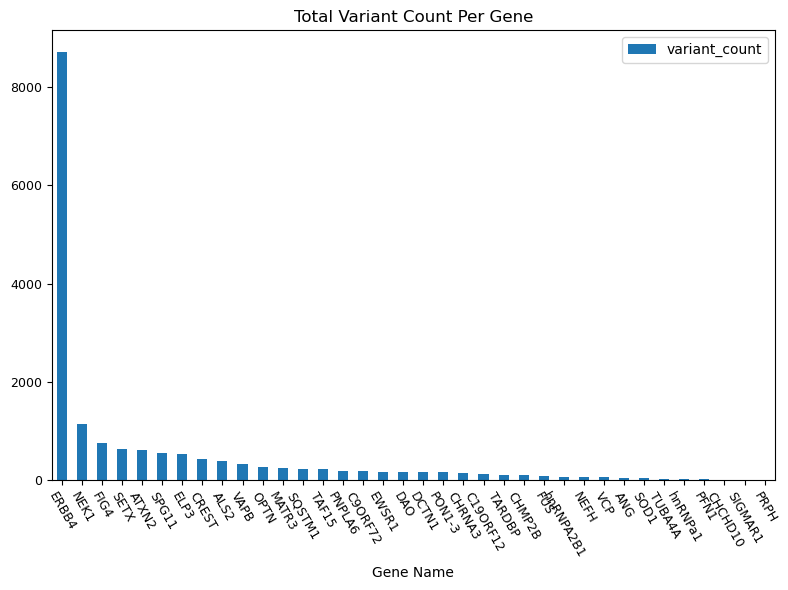

In [31]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [32]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'ATXN2']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [33]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [34]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [35]:
hdf.reset_index(inplace=True)

In [36]:
hdf.head()

,index,count
0,HG02323,2247
1,HG02337,1837
2,HG02555,2542
3,HG02284,1899
4,HG02053,2392


In [37]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(2201.340206185567), 321.630477884363)

## Find top and bottom genomes using mean & STD

In [38]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [39]:
len(top_genomes)

9

In [40]:
len(bottom_genomes)

14

In [41]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [42]:
sdf.head()

,HG02323,HG02337,HG02555,HG02284,HG02053,HG02307,HG02052,HG01986,HG02549,HG02479,...,HG01915,HG02485,HG02577,HG01989,HG02281,HG02455,HG02143,HG02557,HG02013,HG02339
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,56,38,16,19,52,24,18,30,8,17,...,2,27,23,6,19,2,49,9,15,44
ANG,12,5,2,6,10,10,7,5,7,11,...,9,5,3,5,5,13,11,3,13,6
ATXN2,12,14,162,22,168,160,161,167,163,165,...,167,158,163,140,159,17,160,159,153,19
C19ORF12,52,7,14,12,14,15,22,46,13,17,...,9,13,17,8,48,53,5,12,18,13
C9ORF72,12,25,24,46,21,30,30,36,26,32,...,19,44,19,14,15,22,18,13,17,37


In [43]:
tgdf= sdf.loc[top_genes]

In [44]:
tgdf_top_genomes = tgdf[top_genomes]

In [45]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [46]:
tgdf_top_genomes.head()

,HG02555,HG02549,HG02470,HG02545,HG01890,HG02502,HG01894,HG02282,HG02013
gene,,,,,,,,,
ERBB4,1434,1515,1412,1364,1508,1534,1453,1649,1432
NEK1,239,217,323,318,285,314,274,227,221
FIG4,88,100,102,89,74,87,108,57,88
SETX,68,50,26,83,42,47,67,4,42
ATXN2,162,163,154,172,167,164,160,161,153


In [47]:
tgdf_bot_genomes.head()

,HG02337,HG01986,HG02433,HG02445,HG01988,HG02420,HG01958,HG02442,HG02325,HG02436,HG02343,HG01989,HG02455,HG02557
gene,,,,,,,,,,,,,,
ERBB4,1177,879,650,586,771,725,994,615,540,821,561,470,630,1116
NEK1,73,190,161,281,167,233,181,207,240,18,27,178,236,68
FIG4,84,84,82,62,76,38,73,103,82,78,58,99,102,100
SETX,14,56,47,43,73,35,22,60,26,61,15,33,41,25
ATXN2,14,167,137,8,177,138,170,137,138,160,7,140,17,159


## Plot stacked bar chart for top genes & top genomes

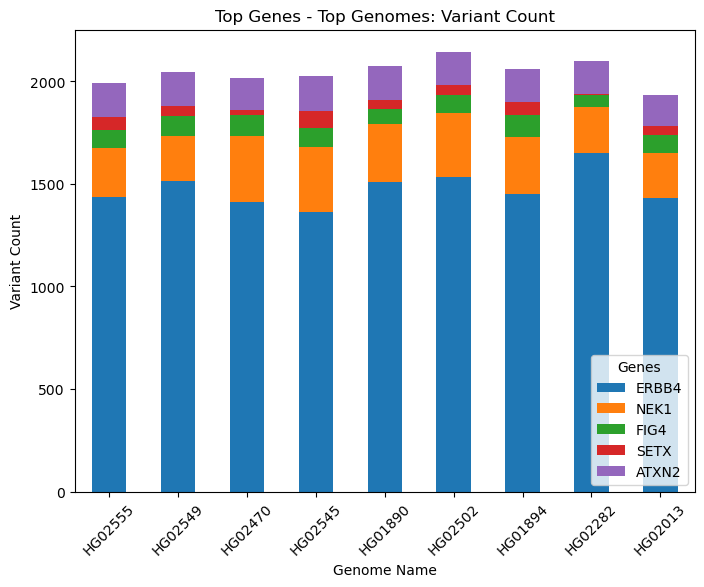

In [48]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

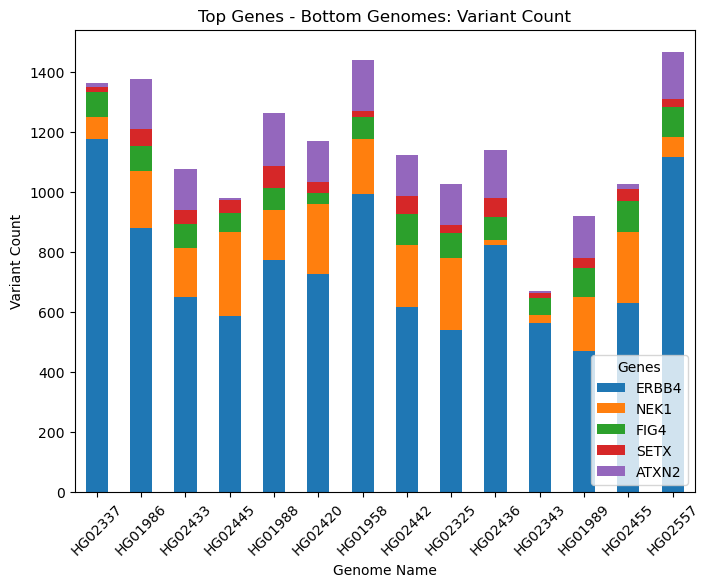

In [49]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()